# Saliency Maps using Flashtorch
---

In questo notebook analizzeremo le Saliency Maps di alcune immagini calcolate con la libreria Flashtorch.

## Saliency Maps

Le **saliency maps** sono generalmente usate come tecniche di *Image Segmentation* dal momento che riescono a sintetizzare un’immagine in una mappa di poche features significative. <br>
Sono matrici di pixel che evidenziano le regioni più rilevanti all’interno delle immagini. 
Calcolando una saliency map per una rete neurale infatti è possibile ottenere delle intuizioni sui punti delle immagini in input per i quali la rete presta maggiore attenzione durante la classificazione.




**Come possiamo avere informazioni sul supporto spaziale di una certa classe in un’immagine?**




* Le saliency maps permettono di visualizzare le features più importanti di un’immagine, come se ci fosse possibile guardare «con gli occhi» della rete.
L’applicazione delle saliency maps alle **reti convoluzionali** è stata introdotta nel 2013.
* Sono state introdotte per rispondere al problema di comprendere gli aspetti visivi catturati all’interno di reti profonde
* L’idea è quella di calcolare i gradienti in backpropagation per risalire alle relazioni tra immagine di input e label di output 
* La saliency map è quindi la mappa dei gradienti della rete e misura l’apporto d’influenza che ogni pixel ha sullo score di classificazione di un’immagine
* Più alto è il valore del gradiente, maggiore sarà l’influenza del pixel sulla confidenza della predizione
* La saliency map di un’immagine evidenzierà quindi i punti coi massimi valori di gradiente


---

Per ogni pixel il gradiente viene calcolato in backpropagation a partire dal risultato della classificazione.


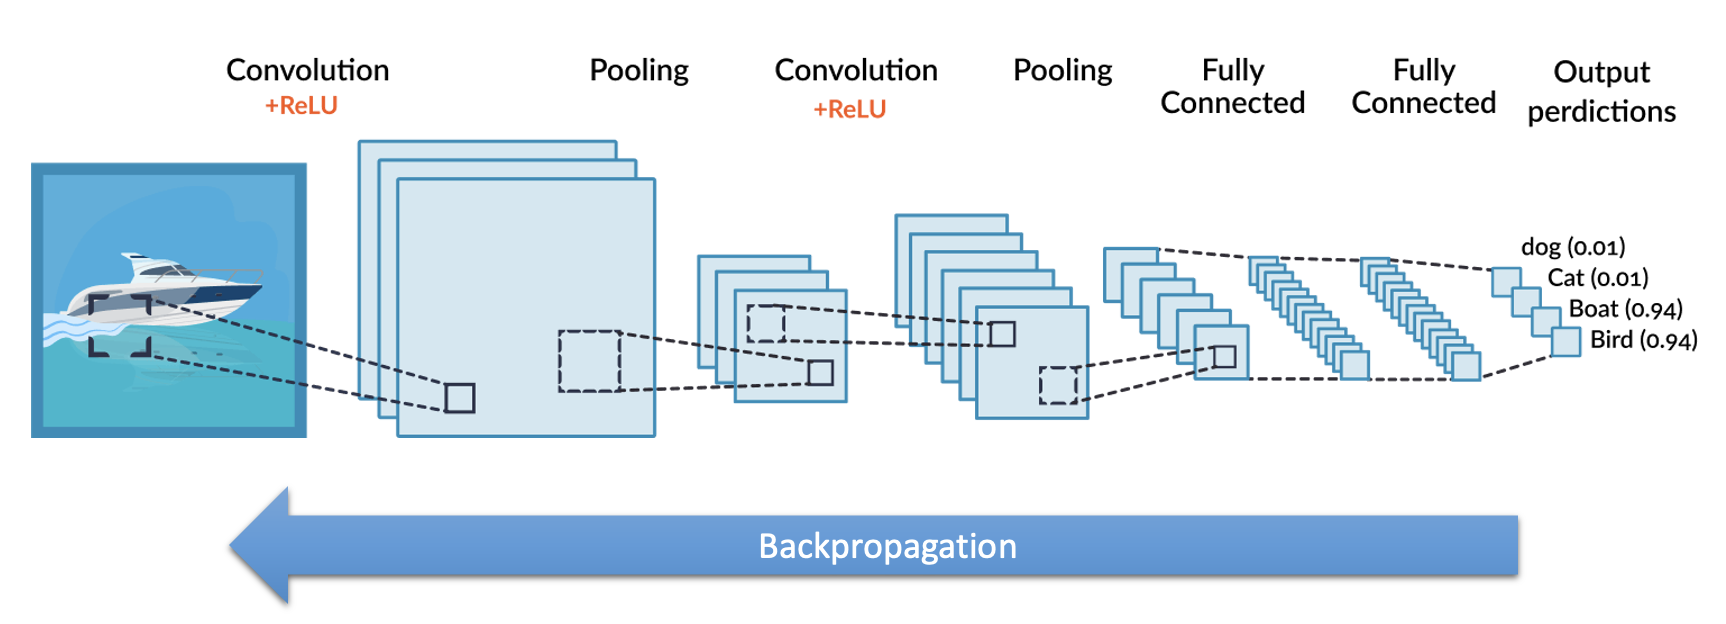

---

Data un’immagine $I_0$, una label di classe $c$ e la funzione di calcolo del class score $S_c(I)$ per una CNN, si vuole ordinare i pixel di $I_0$ in base alla loro influenza su $S_c(I)$.
Per un’immagine $I$ è sempre possibile approssimare il calcolo dello score con una funzione lineare del tipo: <br><br>
$$𝑆_𝑐 (𝐼)≈𝑤^𝑇 𝐼+𝑏$$
<br>
dove il vettore gradiente $w$ che determina direttamente lo score è pari alla derivata parziale di $S_c$ rispetto a $I$: <br><br>
$$𝑤=  (𝜕𝑆_𝑐)/𝜕𝐼$$
<br>
In sostanza, il gradiente indica **di quanto cambia** lo score se si modifica un pixel di una piccola quantità. 
Ci si può aspettare che tali pixel corrispondano alla posizione dell'oggetto nell'immagine.




## Flashtorch

[Documentazione Flashtorch](https://pypi.org/project/flashtorch/0.0.8/)

Installo flashtorch e importo le classi necessarie

In [ ]:
!pip install flashtorch

In [ ]:
from flashtorch.utils import apply_transforms, load_image
from flashtorch.saliency import Backprop

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from PIL import Image

import torch
import torchvision
from torchvision import transforms, datasets, models
from torch import optim, cuda
from torch.utils.data import DataLoader, sampler
import torch.nn as nn

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

## Saliency maps for pre-trained models

Per prima cosa si vuole sperimentare l'utilizzo di flashtorch su alcune immagini prelevate dal dataset **ImageNet** usando modelli pre-addestrati su questo dataset.

**AlexNet**

In [ ]:
alexnet = models.alexnet(pretrained=True)

Creo un'istanza Backprop del modello per il calcolo del gradiente

In [ ]:
backpropAlexNet = Backprop(alexnet)

**VGG16**

In [ ]:
vgg16 = models.vgg16(pretrained=True)

In [ ]:
backpropVGG = Backprop(vgg16)

**GoogleNet**

In [ ]:
googlenet = models.googlenet(pretrained=True)

Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/checkpoints/googlenet-1378be20.pth


In [ ]:
backpropGoog = Backprop(googlenet)

**ResNet_101**

In [ ]:
resnet = models.resnet101(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth


In [ ]:
backpropResnet = Backprop(resnet)

Per prima cosa calcoliamo semplicemente i gradienti di alcune immagini e visualizziamo le saliency maps:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# carica sul tuo Drive le immagini che preferisci. Io uso immagini dal dataset ImageNet

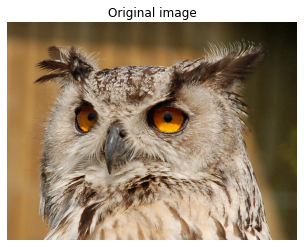

In [ ]:
image = load_image('/content/drive/My Drive/imageNet/owl2.jpg')

plt.imshow(image)
plt.title('Original image')
plt.axis('off');

Saliency maps per AlexNet

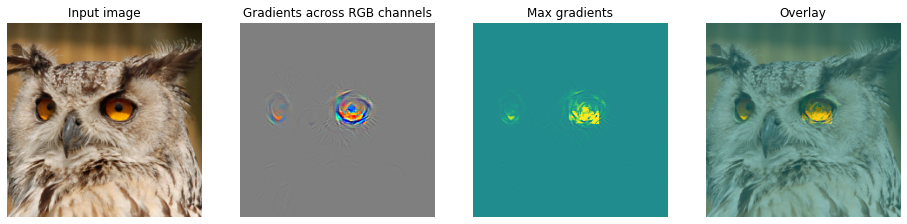

In [ ]:
# trasforma l'immagine in un tensore

owl = apply_transforms(image)

# calcola il gradiente e plotta le saliency maps

backpropAlexNet.visualize(owl, target_class=None, guided=True)

Le saliency maps (quella del gradiente su 3 canali e quella del massimo gradiente) evidenziano quelli che sono, anche per un umano, i tratti distintivi del gufo, gli occhi. <br>Vediamo come si comporta VGG16

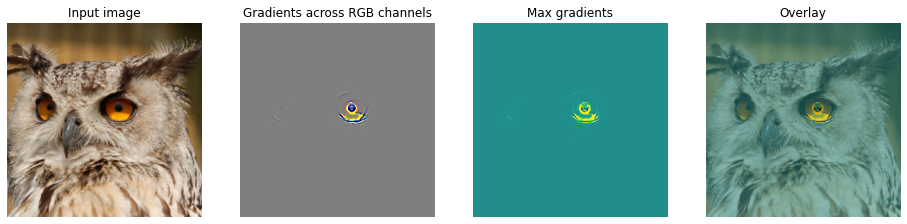

In [ ]:
backpropVGG.visualize(owl, target_class=None, guided=True)

In questo caso i tratti distintivi sono più minimali e si concentrano su un occhio soltato. <br>Vediamo con GoogleNet

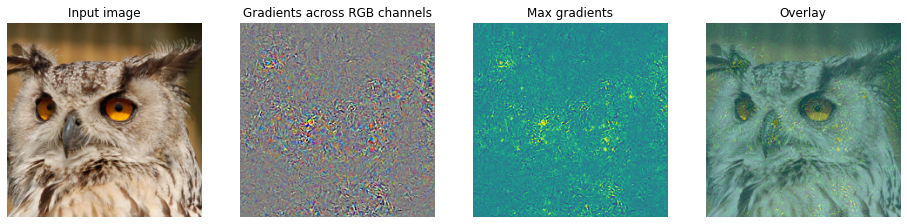

In [ ]:
backpropGoog.visualize(owl, target_class=None, guided=True)

In questo caso la mappa è molto confusa e non mostra alcun tratto dell'animale distinguibile da occhio umano. <br> Vediamo se con ResNet va meglio

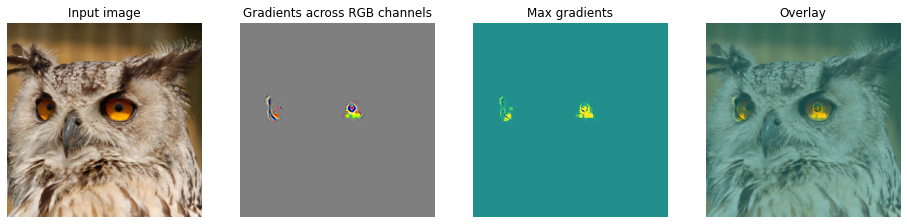

In [ ]:
backpropResnet.visualize(owl, target_class=None, guided=True)

In questo caso la mappa è simile a quella della rete AlexNet ma più minimale.

Proviamo con un'altra immagine:

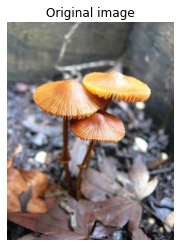

In [ ]:
image = load_image('/content/drive/My Drive/imageNet/fungus1.jpg')

plt.imshow(image)
plt.title('Original image')
plt.axis('off');

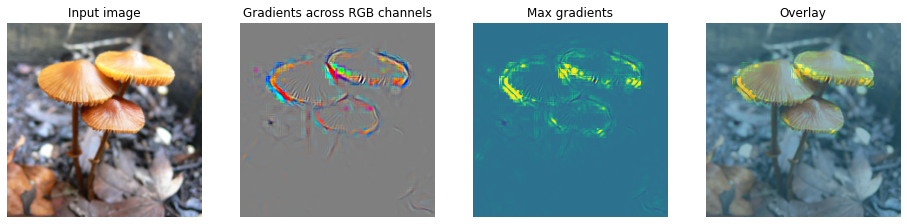

In [ ]:
# Transform the input image to a tensor

fungus = apply_transforms(image)

# AlexNet
backpropAlexNet.visualize(fungus, target_class=None, guided=True)

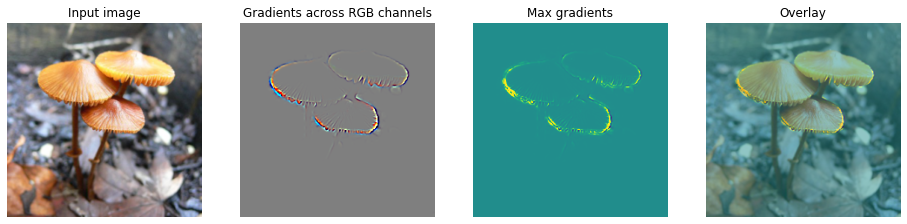

In [ ]:
# VGG16
backpropVGG.visualize(fungus, target_class=None, guided=True)

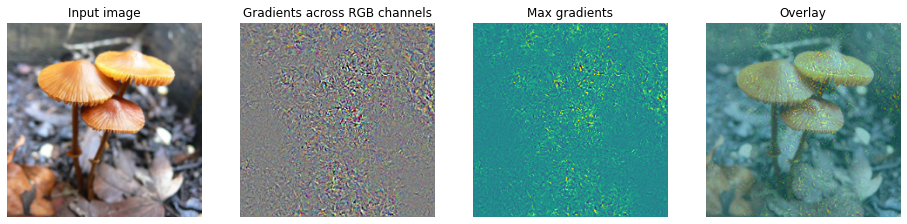

In [ ]:
#GoogleNet
backpropGoog.visualize(fungus, target_class=None, guided=True)

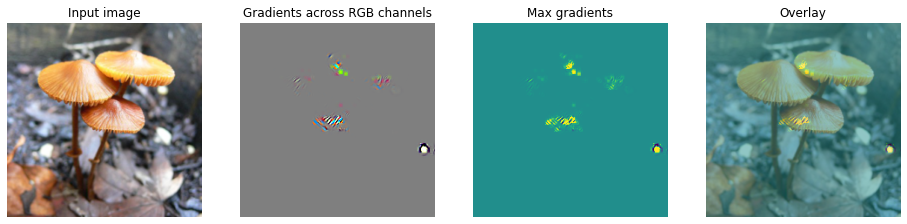

In [ ]:
#ResNet
backpropResnet.visualize(fungus, target_class=None, guided=True)

Anche qui AlexNet e Vgg16 forniscono delle saliency maps interessanti, in particolare quella di Vgg16 evidenzia solo il bordo dei cappelli con qualche minimo dettaglio, che sono in effetti gli elementi più distintivi del fungo. <br> Per quanto riguarda ResNet evidenzia tratti molto minimali difficili da interpretare per un umano, mentre GoogleNet nuovamente non ci ha fornito una mappatura interessante. Probabilmente, in **GoogleNet** il calcolo del gradiente in backpropagation incontra difficoltà e per questo da problemi

---

### Comparing saliency maps with predicted labels on pre-trained models

Ora voglio provare a predirre altre immagini di ImageNet e confrontare le saliency maps con le predizioni top-3

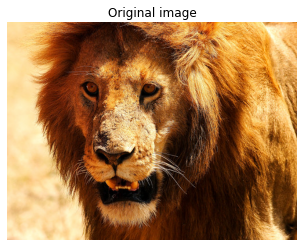

In [ ]:
lion = load_image('/content/drive/My Drive/imageNet/lion_1.jpg')

plt.imshow(lion)
plt.title('Original image')
plt.axis('off');

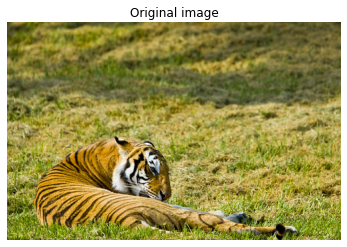

In [ ]:
tiger = load_image('/content/drive/My Drive/imageNet/tiger.jpg')

plt.imshow(tiger)
plt.title('Original image')
plt.axis('off');

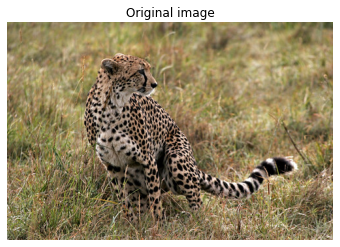

In [ ]:
cheetah = load_image('/content/drive/My Drive/imageNet/cheetah_2.jpg')

plt.imshow(cheetah)
plt.title('Original image')
plt.axis('off');

Usiamo VGG16:

In [ ]:
lion = apply_transforms(lion)
pred = vgg16(lion)

In [ ]:
with open('/content/drive/My Drive/imageNet/imagenet-classes.txt') as f:
  labels = [line.strip() for line in f.readlines()]

In [ ]:
_, index = torch.max(pred, 1)

percentage = torch.nn.functional.softmax(pred, dim=1)[0] * 100

print(labels[index[0]], percentage[index[0]].item())

lion, king of beasts, Panthera leo 99.99302673339844


In [ ]:
_, indices = torch.sort(pred, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:3]]

[('lion, king of beasts, Panthera leo', 99.99302673339844),
 ('llama', 0.0034077605232596397),
 ('ox', 0.0007918147020973265)]

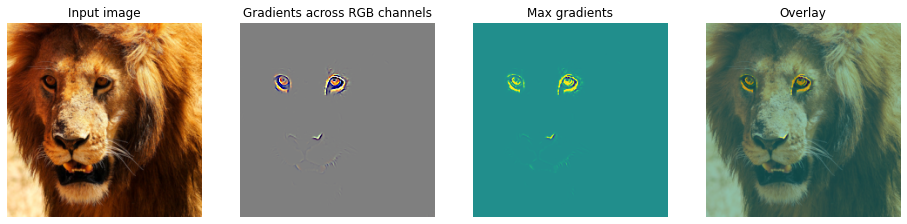

In [ ]:
backpropVGG.visualize(lion, target_class=None, guided=True)

La confidenza della classe 'lion' è quasi del 100% e la saliency map evidenzia pochi tratti assolutamente distintivi del leone, non la criniera come ci si potrebbe aspettare ma piuttosto gli occhi e parte del muso.

In [ ]:
tiger = apply_transforms(tiger)
pred = vgg16(tiger)

In [ ]:
_, index = torch.max(pred, 1)

percentage = torch.nn.functional.softmax(pred, dim=1)[0] * 100

print(labels[index[0]], percentage[index[0]].item())

tiger, Panthera tigris 76.89236450195312


In [ ]:
_, indices = torch.sort(pred, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:3]]

[('tiger, Panthera tigris', 76.89236450195312),
 ('tiger cat', 20.592979431152344),
 ('African hunting dog, hyena dog, Cape hunting dog, Lycaon pictus',
  0.9174217581748962)]

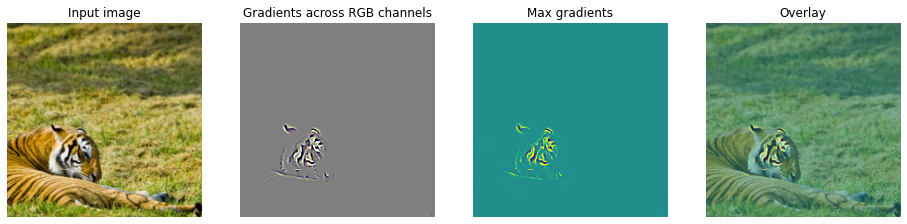

In [ ]:
backpropVGG.visualize(tiger, target_class=None, guided=True)

In [ ]:
cheetah = apply_transforms(cheetah)
pred = vgg16(cheetah)

In [ ]:
_, index = torch.max(pred, 1)

percentage = torch.nn.functional.softmax(pred, dim=1)[0] * 100

print(labels[index[0]], percentage[index[0]].item())

cheetah, chetah, Acinonyx jubatus 97.35708618164062


In [ ]:
_, indices = torch.sort(pred, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:3]]

[('cheetah, chetah, Acinonyx jubatus', 97.35708618164062),
 ('leopard, Panthera pardus', 2.534281015396118),
 ('jaguar, panther, Panthera onca, Felis onca', 0.10508188605308533)]

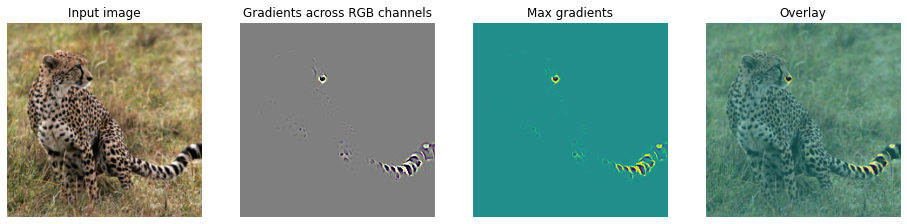

In [ ]:
backpropVGG.visualize(cheetah, target_class=None, guided=True)

Per tutte e 3 le immagini le saliency map evidenziano i punti salienti degli animali.


Abbiamo un valore di top-1 più basso per l'immagine **tiger** quindi andiamo a vedere le sue predizioni anche su altri modelli e vediamo come cambiano le saliency maps in relazione alla confidenza della predizione top-1:

In [ ]:
pred = resnet(tiger)

In [ ]:
_, index = torch.max(pred, 1)

percentage = torch.nn.functional.softmax(pred, dim=1)[0] * 100

print(labels[index[0]], percentage[index[0]].item())

tiger, Panthera tigris 95.16461944580078


In [ ]:
_, indices = torch.sort(pred, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:3]]

[('tiger, Panthera tigris', 95.16461944580078),
 ('tiger cat', 4.808748722076416),
 ('zebra', 0.002127964748069644)]

La predizione di ResNet è decisamente migliore, vediamo come cambia la saliency map

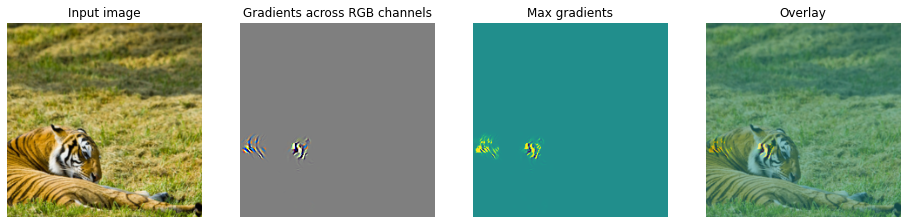

In [ ]:
backpropResnet.visualize(tiger, target_class=None, guided=True)

Sono bastati pochi punti salienti che evidenziano le striature del manto della tigre per riconoscerla con un'affidabilità del 95%, rispetto alla rete VGG16 la quale ha prodotto una saliency map con più tratti salienti ma con una confidenza del 76%.

Sembra che **più parti salienti** ritroviamo della mappa più per la rete è **difficile** riconoscere l'immagine. Infatti, con ResNet abbiamo 95% di probabilità e una saliency map minimale, mentre se vediamo per AlexNet abbiamo:

In [ ]:
pred = alexnet(tiger)

In [ ]:
_, index = torch.max(pred, 1)

percentage = torch.nn.functional.softmax(pred, dim=1)[0] * 100

print(labels[index[0]], percentage[index[0]].item())

tiger, Panthera tigris 84.69143676757812


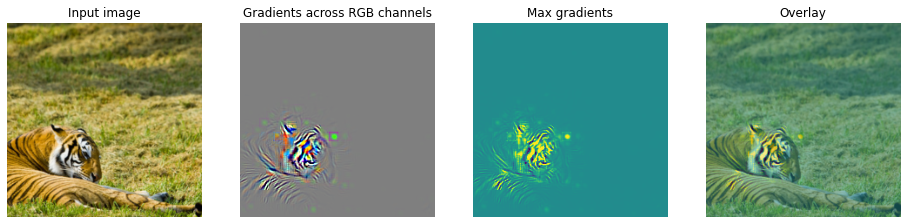

In [ ]:
backpropAlexNet.visualize(tiger, target_class=None, guided=True)

Una minore accuracy e una saliency map più complessa. 

---

Per fare uno studio più approfondito si vuole provare a visualizzare le saliency maps su immagini di un altro dataset reale, classificato con un modello pre-addestrato, in modo da provare maggiormente le ipotesi fatte in precedenza.

# Transfer Learning

In questa sezione andrò a classificare immagini di CIFAR10 su due modelli pre-addestrati semplici, AlexNet e VGG16

In [ ]:
# carico il dataset

tensor_cifar10 = torchvision.datasets.CIFAR10(root='data', train=True, download=True,transform=transforms.ToTensor())
tensor_cifar10_val = torchvision.datasets.CIFAR10(root='data', train=False, download=True,transform=transforms.ToTensor())

batch_size = 16
trainloader = torch.utils.data.DataLoader(tensor_cifar10, batch_size=len(tensor_cifar10))
validloader = torch.utils.data.DataLoader(tensor_cifar10_val, batch_size=len(tensor_cifar10_val))

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
trainiter = iter(trainloader)
training_set, training_labels = trainiter.next()

<class 'list'>


Per prima cosa proviamo a classificare le nuove immagini senza effettuare alcun training addizionale, ma solo modificando i livelli fully-connected

## Freeze conv layers and only use fully-connected layers

**Preparo AlexNet**

Blocco l'aggiornamento dei parametri

In [ ]:
# ricarico il modello
alexnet = models.alexnet(pretrained=True)
# Freeze layers
for param in alexnet.parameters():
    param.requires_grad = False

Sostituisco i livelli fully-connected per la classificazione

In [ ]:
n_inputs = alexnet.classifier[6].in_features
n_classes = len(trainloader.dataset.classes)

# Add on classifier
alexnet.classifier[6] = nn.Sequential(
    nn.Linear(n_inputs, 256), 
    nn.ReLU(), 
    nn.Linear(256, n_classes), 
    nn.LogSoftmax(dim=1)
)

alexnet.classifier

Sequential(
  (0): Dropout(p=0.5, inplace=False)
  (1): Linear(in_features=9216, out_features=4096, bias=True)
  (2): ReLU(inplace=True)
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=4096, out_features=4096, bias=True)
  (5): ReLU(inplace=True)
  (6): Sequential(
    (0): Linear(in_features=4096, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=10, bias=True)
    (3): LogSoftmax()
  )
)

In [ ]:
# dispongo il modello in modalità eval
alexnet.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

**Preparo VGG16**

In [ ]:
# ricarico il modello
vgg16 = models.vgg16(pretrained=True)
# Freeze layers
for param in vgg16.parameters():
    param.requires_grad = False

In [ ]:
n_inputs = vgg16.classifier[6].in_features
n_classes = len(trainloader.dataset.classes)

# Add on classifier
vgg16.classifier[6] = nn.Sequential(
    nn.Linear(n_inputs, 256), 
    nn.ReLU(), 
    nn.Dropout(0.5),
    nn.Linear(256, n_classes), 
    nn.LogSoftmax(dim=1)
)

vgg16.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Sequential(
    (0): Linear(in_features=4096, out_features=256, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=256, out_features=10, bias=True)
    (4): LogSoftmax()
  )
)

In [ ]:
vgg16.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

**Predictions**

In [ ]:
def plot_image(tensor):
    plt.figure(figsize=(2,2))
    plt.imshow(tensor.numpy().transpose(1, 2, 0))
    plt.show()

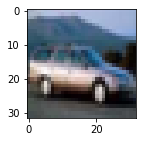

In [ ]:
plot_image(training_set[4])

In [ ]:
pred = vgg16(car)

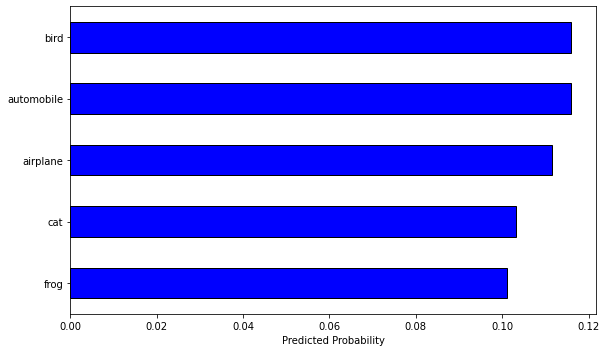

In [ ]:
display_prediction(car, training_labels[4], trainloader.dataset.classes, vgg16, 5)

La label reale è la seconda più probabile con una confidenza molto bassa, meno del 12%. Diamo un'occhiata alla saliency map

/usr/local/lib/python3.6/dist-packages/flashtorch/saliency/backprop.py:111: UserWarning: The predicted class index 9 does notequal the target class index 1. Calculatingthe gradient w.r.t. the predicted class.
  'the gradient w.r.t. the predicted class.'


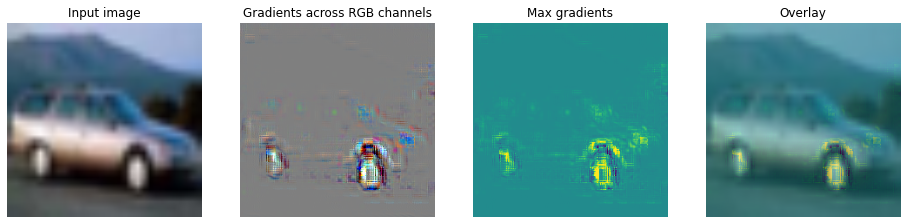

In [ ]:
backpropVGG.visualize(car, target_class=1, guided=True)

La saliency map sembra buona e definisce un po' i contorni dell'auto e le ruote.

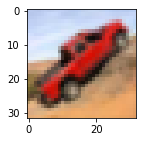

In [ ]:
plot_image(training_set[140])

In [ ]:
car = apply_transforms(training_set[140])
pred = alexnet(car)

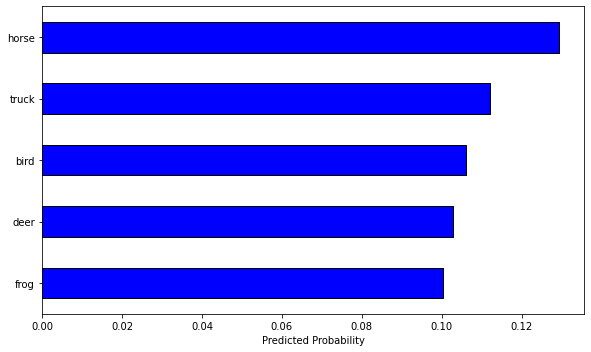

In [ ]:
display_prediction(car, training_labels[140], trainloader.dataset.classes, alexnet, 5)

/usr/local/lib/python3.6/dist-packages/flashtorch/saliency/backprop.py:111: UserWarning: The predicted class index 4 does notequal the target class index 1. Calculatingthe gradient w.r.t. the predicted class.
  'the gradient w.r.t. the predicted class.'


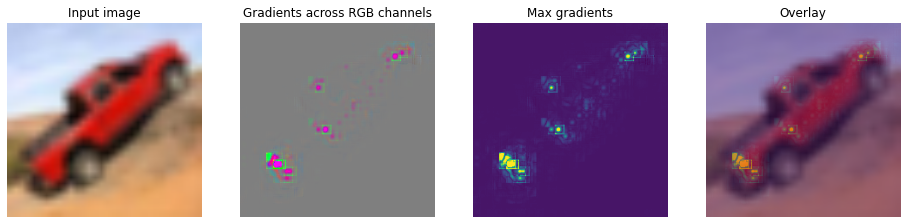

In [ ]:
backpropAlexNet.visualize(car, target_class=1, guided=True)

Il modello ha trovato i valori di gradiente più alti sulla parte posteriore del pickup, elemento che anche alla vista risulta abbastanza inutile a distinguere il tipo di immagine, d'altronde la label **automobile** non è proprio presente nella top-5. In generale, è come se tutte e 10 le classi abbiano più o meno la stessa probabilità.

In [ ]:
pred = vgg16(car)

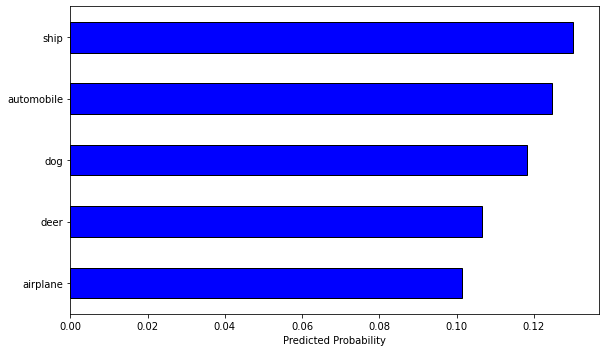

In [ ]:
display_prediction(car, training_labels[140], trainloader.dataset.classes, vgg16, 5)

/usr/local/lib/python3.6/dist-packages/flashtorch/saliency/backprop.py:111: UserWarning: The predicted class index 4 does notequal the target class index 1. Calculatingthe gradient w.r.t. the predicted class.
  'the gradient w.r.t. the predicted class.'


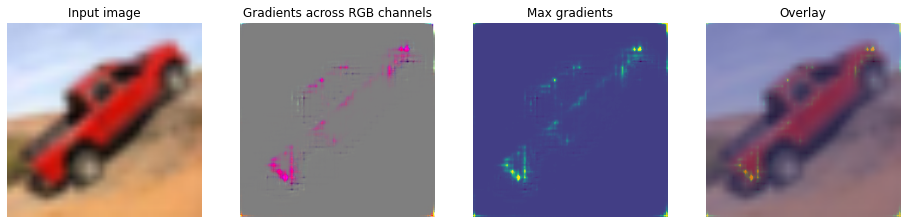

In [ ]:
backpropVGG = Backprop(vgg16)
backpropVGG.visualize(car, target_class=1, guided=True)

Questa saliency map ci piace un po' di più e in effetti la label reale è presente nella classifica ed è la seconda più probabile. Tuttavia in generale le performance sui modelli addestrati solo su ImageNet sono molto deludenti, dobbiamo quindi fare un training aggiuntivo, per vedere se anche le saliency maps migliorano. 

---

## Re-training

La scarsa accuratezza delle predizioni si spiega con la scarsa qualità delle saliency maps ed è dovuta al fatto che non abbiamo nuovamente addestrato il modello su CIFAR10. Provvediamo allora a farlo per vedere se migliorando le performance migliorano anche le saliency maps:

Per semplicità si vuole addestrare uno solo dei modelli su CIFAR10, usiamo VGG16

In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print('Run on GPU')
else:
    device = torch.device("cpu")

Run on GPU


In [ ]:
vgg16 = models.vgg16(pretrained=True, progress=False)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/checkpoints/vgg16-397923af.pth


In [ ]:
for param in vgg16.parameters():
    param.requires_grad = False

In [ ]:
batch_size = 32
trainloader = torch.utils.data.DataLoader(tensor_cifar10, batch_size=batch_size)
validloader = torch.utils.data.DataLoader(tensor_cifar10_val, batch_size=batch_size)

In [ ]:
n_inputs = vgg16.classifier[6].in_features
n_classes = len(trainloader.dataset.classes)

# Add on classifier
vgg16.classifier[6] = nn.Sequential(
    nn.Linear(n_inputs, 256), 
    nn.ReLU(), 
    nn.Dropout(0.4),
    nn.Linear(256, n_classes), 
    nn.LogSoftmax(dim=1)
)

vgg16.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Sequential(
    (0): Linear(in_features=4096, out_features=256, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.4, inplace=False)
    (3): Linear(in_features=256, out_features=10, bias=True)
    (4): LogSoftmax()
  )
)

Utility methods:

In [ ]:
def predict_on_image(img_tensor, real_class, classes_list, model, topk=5):
    """Make a prediction for an image using a trained model

    Params
    --------
        img_tensor (tensor): tensor of the image
        classes_list list(str): list of category 
        model (PyTorch model): trained model for inference
        topk (int): number of top predictions to return

    Returns

    """
    img_tensor = img_tensor.view(1, 3, 224, 224)

    # Set to evaluation
    with torch.no_grad():
        model.eval()
        # Model outputs log probabilities
        out = model(img_tensor)
        ps = torch.exp(out)

        # Find the topk predictions
        topk, topclass = ps.topk(topk, dim=1)

        # Extract the actual classes and probabilities
        top_classes = [
            classes_list[class_] for class_ in topclass.cpu().numpy()[0]
        ]
        top_p = topk.cpu().numpy()[0]

        return img_tensor.cpu().squeeze(), top_p, top_classes, real_class
    
    
def display_prediction(img, real_class, classes, model, topk):
    """Display image and preditions from model"""

    # Get predictions
    image, ps, classes, y_obs = predict_on_image(img, real_class, classes, model, topk)
    # Convert results to dataframe for plotting
    result = pd.DataFrame({'p': ps}, index=classes)

    plt.figure(figsize=(16, 5))
    ax = plt.subplot(1, 2, 2)
    
    # Plot a bar plot of predictions
    result.sort_values('p')['p'].plot.barh(color='blue', edgecolor='k', ax=ax)
    plt.xlabel('Predicted Probability')
    plt.tight_layout()
    
    
def compute_accuracy(output, target, topk=(1, )):
    """Compute the topk accuracy(s)"""
    output = output.to(device)
    target = target.to(device)

    with torch.no_grad():
        maxk = max(topk)
        batch_size = target.size(0)

        # Find the predicted classes and transpose
        _, pred = output.topk(k=maxk, dim=1, largest=True, sorted=True)
        pred = pred.t()

        # Determine predictions equal to the targets
        correct = pred.eq(target.view(1, -1).expand_as(pred))

        res = []

        # For each k, find the percentage of correct
        for k in topk:
            correct_k = correct[:k].view(-1).float().sum(0, keepdim=True)
            res.append(correct_k.mul_(100.0 / batch_size).item())
        return res

    
def evaluate(model, test_loader, criterion, topk=(1, 5)):
    """Measure the performance of a trained PyTorch model

    Params
    --------
        model (PyTorch model): trained cnn for inference
        test_loader (PyTorch DataLoader): test dataloader
        topk (tuple of ints): accuracy to measure

    Returns
    --------
        results (DataFrame): results for each category

    """
    classes = []
    losses = []
    # Hold accuracy results
    acc_results = np.zeros((len(test_loader.dataset), len(topk)))
    i = 0

    model.eval()
    with torch.no_grad():

        # Testing loop
        for data, targets in test_loader:

            data, targets = data.to(device), targets.to(device)

            # Raw model output
            out = model(data)
            # Iterate through each example
            for pred, true in zip(out, targets):
                # Find topk accuracy
                acc_results[i, :] = compute_accuracy(pred.unsqueeze(0), true.unsqueeze(0), topk)
                
                #classes.append(model.idx_to_class[true.item()])
                classes.append(test_loader.dataset.classes[true.item()])
                
                # Calculate the loss
                loss = criterion(pred.view(1, n_classes), true.view(1))
                losses.append(loss.item())
                i += 1

    # Send results to a dataframe and calculate average across classes
    results = pd.DataFrame(acc_results, columns=[f'top{i}' for i in topk])
    results['class'] = classes
    results['loss'] = losses
    results = results.groupby(classes).mean()

    return results.reset_index().rename(columns={'index': 'class'})

Compiling:

In [ ]:
vgg16 = vgg16.to(device)

criterion = nn.NLLLoss()
optimizer = optim.Adam(vgg16.parameters())

Training:

In [ ]:
epochs = 1
steps = 0
running_loss = 0
print_every = 20

train_losses, test_losses = [], []

for epoch in range(epochs):
    for inputs, labels in trainloader:
        steps += 1
        inputs, labels = inputs.to(device), labels.to(device)
        
        if epoch == 0 and steps == 1:
            print(f'input shape is {inputs.shape}, labels are {labels.shape}')
        
        optimizer.zero_grad()
        logps = vgg16.forward(inputs)
        
        loss = criterion(logps, labels)
        loss.backward()
        
        optimizer.step()
        running_loss += loss.item()
        
        if steps % print_every == 0:
            test_loss = 0
            accuracy = 0
            vgg16.eval()
            
            with torch.no_grad():
                for inputs, labels in validloader:
                    inputs, labels = inputs.to(device), labels.to(device)

                    logps = vgg16.forward(inputs)
                    batch_loss = criterion(logps, labels)
                    
                    test_loss += batch_loss.item()
                    
                    ps = torch.exp(logps)
                    top_p, top_class = ps.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
                    
            train_losses.append(running_loss/len(trainloader))
            test_losses.append(test_loss/len(validloader))                    
            
            print(f"Epoch {epoch+1}/{epochs}... "
                  f"Train loss: {running_loss/print_every:.3f}... "
                  f"Valid loss: {test_loss/len(validloader):.3f}... "
                  f"Valid accuracy: {accuracy/len(validloader):.3f}")
            
            running_loss = 0
            
            vgg16.train()

Ora dovrebbe performare meglio, specialmente nella classifica top-5:

In [ ]:
testloader = torch.utils.data.DataLoader(tensor_cifar10_val, batch_size=32, shuffle=True)
criterion = nn.NLLLoss()
# Evaluate the model on all the training data
results = evaluate(vgg16, testloader, criterion)
results.head(10)

class  top1  top5      loss
0    airplane  57.6  92.8  1.247098
1  automobile  69.4  96.9  1.009681
2        bird  31.8  92.7  1.730567
3         cat  45.8  95.9  1.539727
4        deer  32.0  89.8  1.744819
5         dog  54.4  96.8  1.264847
6        frog  67.5  93.4  1.098079
7       horse  61.9  94.1  1.309002
8        ship  68.9  94.5  1.009316
9       truck  52.5  93.4  1.304504

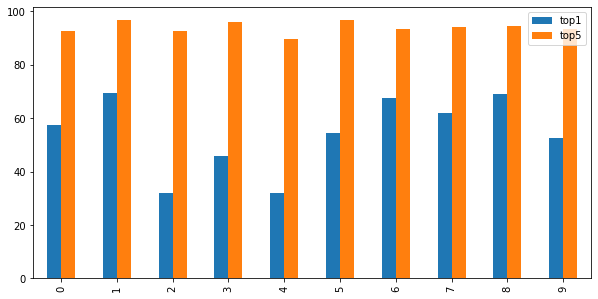

In [ ]:
results[['top1', 'top5']].plot.bar(figsize=(10, 5));

Le predizioni top-5 sul validation set hanno una buona confidenza e quelle top-1, anche se non sono del tutto soddisfacenti, sono decisamente migliori di prima.

Prendiamo allora come prima un'immagine, calcoliamo la predizione e confrontiamola con la saliency map:

In [ ]:
trainiter = iter(trainloader)
training_set, training_labels = trainiter.next()

In [ ]:
validiter = iter(testloader)
validation_set, validation_labels = validiter.next()

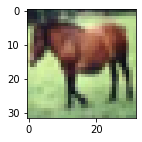

In [ ]:
plot_image(validation_set[7])

In [ ]:
horse = apply_transforms(validation_set[7])
horse = horse.to(device)
pred = vgg16(horse)

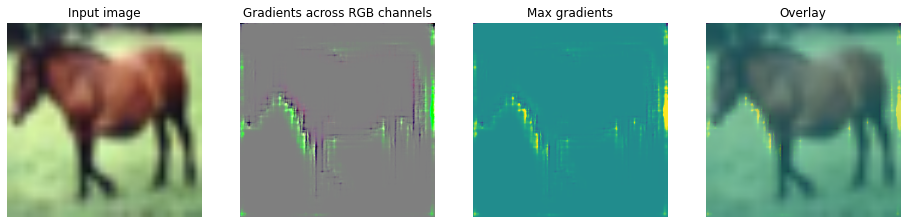

In [ ]:
backpropVGG = Backprop(vgg16)
backpropVGG.visualize(horse, target_class=None, guided=True, use_gpu=True)

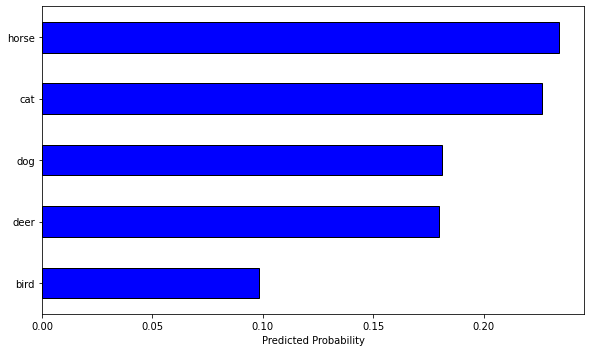

In [ ]:
display_prediction(horse, validation_labels[7], validloader.dataset.classes, vgg16, 5)

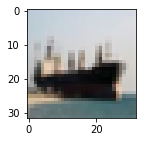

In [ ]:
plot_image(validation_set[13])

In [ ]:
ship = apply_transforms(validation_set[13])
ship = ship.to(device)
pred = vgg16(ship)

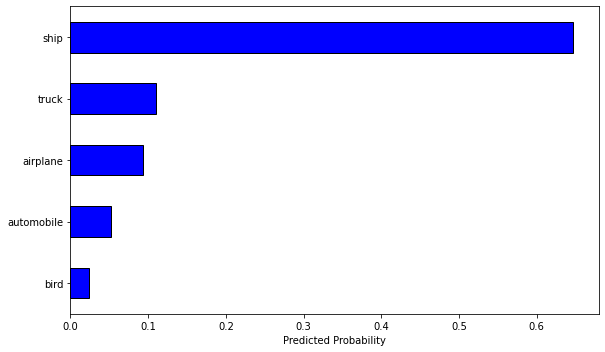

In [ ]:
display_prediction(ship, validation_labels[13], validloader.dataset.classes, vgg16, 5)

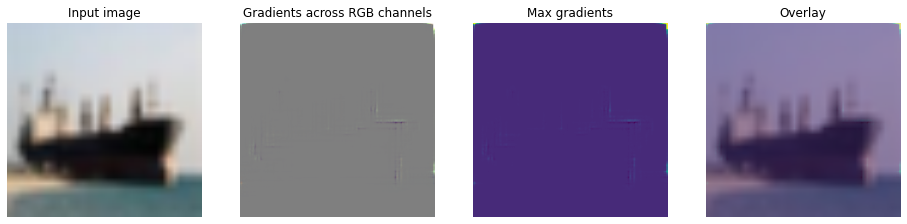

In [ ]:
backpropVGG.visualize(dog, target_class=None, guided=True, use_gpu=True)

Si intravede leggermente il contorno della prua della nave

Vediamo infine l'immagine del training set che avevamo analizzato nella parte precedente

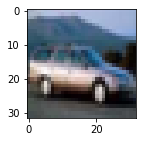

In [ ]:
plot_image(training_set[4])

In [ ]:
car = apply_transforms(training_set[4])
pred = vgg16(car)

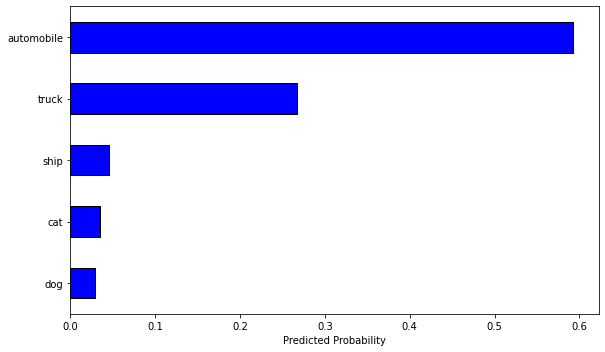

In [ ]:
display_prediction(car, training_labels[4], trainloader.dataset.classes, vgg16, 5)

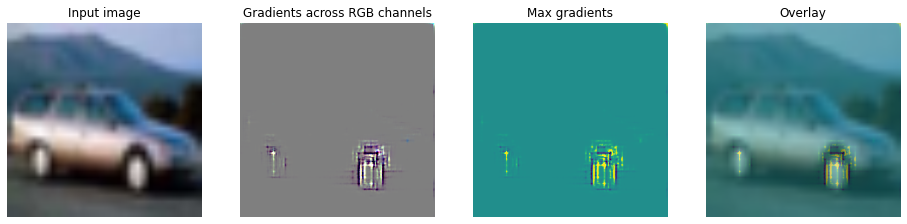

In [ ]:
backpropVGG.visualize(car, target_class=1, guided=True, use_gpu=True)

La predizione è migliorata rispetto a prima, considerando che è un'immagine che ora la rete conosce la confidenza non è molto elevata, e anche la saliency map presenta delle differenze, infatti ora sono evidenziati come tratti salienti essenzialmente le ruote dell'auto, ciò che effettivamente anche per noi è la discriminante principale.

---

## Conclusioni

Abbiamo visto che nel caso di immagini che una rete conosce bene le saliency maps sono molto significative, come nel caso delle immagini di ImageNet, infatti, quelle calcolate sui modelli pre-addestrati, evidenziano i tratti più salienti delle figure rappresentate, quelli che anche per un umano potrebbero costituire i punti più discriminanti nel distinguere una oggetto da un altro. <br> Si è poi voluto valutare la correlazione tra confidenza delle predizioni e saliency maps, usando il dataset CIFAR10 sulle reti pre-addestrate. Il risultato non è stato dei migliori in quando il dataset che ho scelto si è rivelato non adatto in quanto le immagini avevano una risoluzione troppo bassa (32x32). Tuttavia, anche dall'analisi sulle predizioni fatte per ImageNet che avevano una confidenza molto alta, è stato possibile notare come:


*   Quando al modello pre-trained sostituiamo soltanto i livelli di classificazione lasciando freezzati quelli convoluzionali, l'accuratezza delle predizioni è pessima e anche le saliency maps evidenziano zone grossolane e poco significative
*   Quando il modello pre-trained viene riaddestrato sul nuovo dataset, e quindi quando l'accuratezza delle predizioni è alta, con essa migliorano anche le saliency maps, che evidenziano tratti più minimali o contorni sottili e significativi.

Un ulteriore approfondimento sarebbe usare un dataset con immagini a risoluzione più alta (es. 224x224) come il Flower Dataset, per vedere se le mie ipotesi parzialmente confermate nella parte finale di questo notebook possano ricevere delle conferme più significative. 